


\begin{align}
\frac{\partial  x_i}{\partial t} = v_i
\end{align}

\begin{align}
\frac{\partial  v_i}{\partial t} = \frac{f(x_i+\Delta x)+f(x_i-\Delta x)-2f(x_i)}{\Delta x^2}
\end{align}


Since acceleration of each bead is not dependent upon velocity so we are gonna use our favorite $VERLET \ \ ALGORITHM$

\begin{equation*}
  { x_i }(t+ \Delta t  /2) =   { x_i}(t) +\frac{\Delta t}{2}   { v_i}(t)
\end{equation*}

\begin{equation*}
  { v_i }(t+ \Delta t) =   { v_i}(t) +\Delta t   { a_i}(t+ \Delta t/2)
\end{equation*}

\begin{align*}
  { x_i }(t+ \Delta t) =   { x_i}(t+ \Delta t/2) + \frac{\Delta t}{2} v_i(t+ \Delta t)
\end{align*}

where $a_i$ is given by equation 2.

## How to write code


1. First decide what you want $f(x,t = 0)$ to be !
2. Then after creating x array , calculate dx and define your $dt$ according to Courant  condition which is $\frac{v dt}{dx} \leq 1$
3. Now run a main loop so that in each step you update position of each bead. This will require running second loop within a loop    :')

4. so after every step of a main loop you will have a new position array. You can stack these array vertically or horizontally using np.hstack or np.vstack command 

# <center>Python Code</center> 




The following program plot the position array at different time instant 

 dt= 0.0024999999999999996


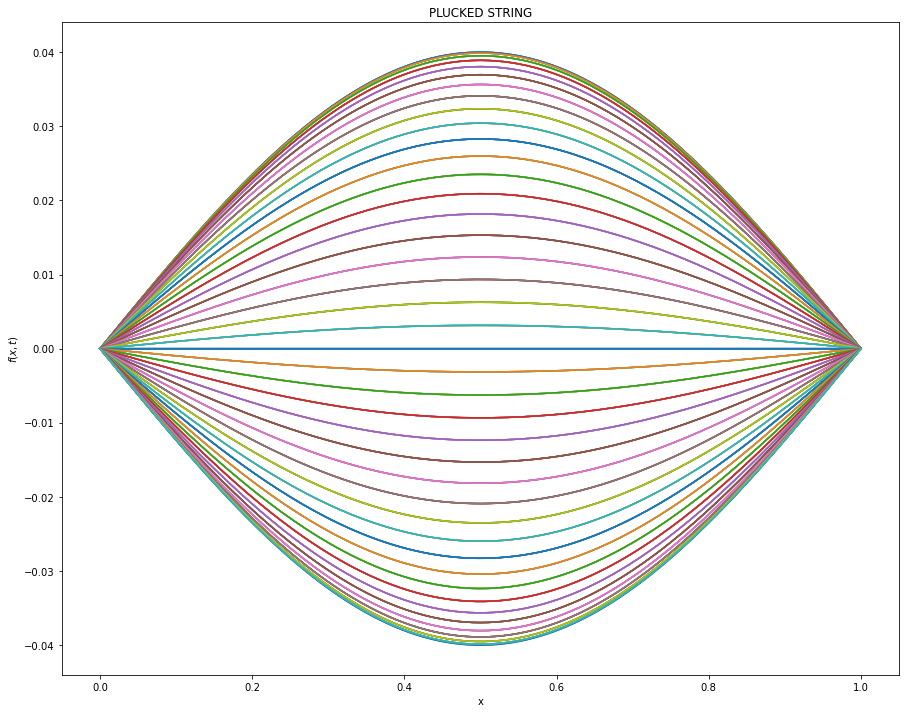

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math



N = 200 

t = 0.0  ## Initial Time


plt.figure(figsize  = (15,12))
plt.xlabel(r'x')
plt.ylabel(r'$f(x,t)$')
plt.title('PLUCKED STRING')

x = np.linspace(0,1,N+1) ##taking N+1 points

dx = x[3]-x[2]
dt = 0.5*dx
print (' dt=' , dt)

Pos =  0.04*np.sin(np.pi*x)

Axer = np.zeros(N+1)  ## ACCELARATION ARRAY 
Vel = np.zeros(N+1)  ##inital velocity

for l in range(1,N):
    Axer[l] = (1/(dx*dx))*(Pos[l+1]+Pos[l-1]-2*Pos[l])  ##calculating acceleration for each bead

xos = Pos ## This is a array in which i will be stacking the position at differnt instants  

N_iter = 2000   ## iteration number
for i in range(N_iter):
    
    if(i%10==0): ##plotting condition of beads after 10dt. you can change it if you want
        plt.plot(x,Pos)

    Pos= Pos+Vel*dt/2.0  #updating position
    for j2 in range(1,N):    
        Axer[j2]= (1/(dx*dx))*(Pos[j2+1]+Pos[j2-1]-2*Pos[j2]) #updating acceleration
 
  

    Vel =  Vel+Axer*dt ##updating velocity
    Pos= Pos+Vel*dt/2.0  ##updating position again. yeah that's verlet 
    xos = np.vstack((xos,Pos)) ##it contains position of each bead at different instant as a column 


plt.show() 


## Looks Cute no! 

Let's do the simulation now using bqplot (it will not work on colab. You can download this notebook and run this on your computer if you have bqplot library )

In [2]:
import bqplot.pyplot as plt
from ipywidgets import*


plt.figure(animation_duration = 1,layout = {'width':'900px','height':'700px'})

plot  = plt.plot(x,x)
plt.ylim(-0.05,0.05)
plt.show()
def g(n):
    plot.y = xos[n,:]
    
interact(g,n = Play(value = 0,step = 2,min = 0,max = N_iter,interval = 1))    

interactive(children=(Play(value=0, description='n', interval=1, max=2000, step=2), Output()), _dom_classes=('…

<function __main__.g(n)>

# Output

## Wait ! Wait!  How do we know it's true ?

aren't we forgetting something ??


How do we know that this is true?,we have to check for Energy conservation.


if density of the string is $\rho$ and tension is $T$ then total energy is

\begin{align}
E = \int_0^1 \frac{1}{2} \rho \bigg ( \frac{\partial f}{\partial t} \bigg)^2 + \frac{1}{2} T  \frac{1}{2} \rho \bigg ( \frac{\partial f}{\partial x} \bigg)^2
\end{align}


we have taken $\rho$ and $T$ = 1 so we will just evaluate upper integral. It can be written as sum 


\begin{align}
E = \sum_{i =0}^{N} \frac{1}{2}v_i^2 \Delta x  +\frac{1}{2}\bigg ( \frac{\partial f}{\partial x} \bigg)^2 \Delta x 
\end{align}


now the question comes how do we evaluate $\frac{\partial f}{\partial x}$. it can be found in the following way 


we know 
\begin{align}
f(x+\Delta x) = f(x) +\frac{\partial f}{\partial x} \Delta x
\end{align}


\begin{align}
f(x - \Delta x) = f(x)  - \frac{\partial f}{\partial x} \Delta x
\end{align}




subtracting $eq.(9)$ from  $eq(8)$ gives 


\begin{equation*}
\frac{\partial f}{\partial x} = \frac {f(x + \Delta x) -f(x - \Delta x) }{2\Delta x }
\end{equation*}

and total energy will be 


\begin{align}
E = \sum_{i =0}^{N} \frac{1}{2}v_i^2 \Delta x  +\frac{1}{2}\bigg ( \frac {f(x + \Delta x) -f(x - \Delta x) }{2\Delta x } \bigg)^2 \Delta x 
\end{align}

\begin{align}
E = \sum_{i =0}^{N} \frac{1}{2}v_i^2 \Delta x  + \frac {f(x + \Delta x) -f(x - \Delta x) }{8\Delta x }  
\end{align}


# Code for energy conservation

 dt= 0.0019999999999999996


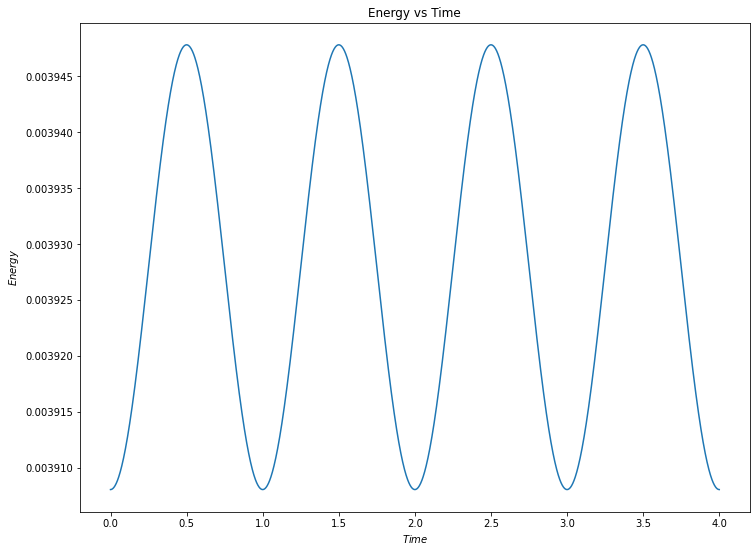

In [3]:
import matplotlib.pyplot as plt
import numpy as np



N = 200 ## total number of beads including end point N+1

t = 0.0  ## Initial Time
Time = [t]

plt.figure(figsize  = (12,9))
plt.xlabel(r'$Time$')
plt.ylabel(r'$Energy$')
plt.title('Energy vs Time')

x = np.linspace(0,1,N+1) ## it contsins end point too

dx = x[3]-x[2]
dt = dx/2.5
print (' dt=' , dt)

Pos =  0.04*np.sin(np.pi*x) ##creating f(x) at t = 0

Axer = np.zeros(N+1)  ## ACCELARATION ARRAY 
Vel = np.zeros(N+1)  ##inital velocity ##initial velocities



E = 0
for l in range(1,N):
    Axer[l] = (1/(dx*dx))*(Pos[l+1]+Pos[l-1]-2*Pos[l]) ##total energy at t = 0

    E+= 0.5*Vel[l]*Vel[l]*dx + ((Pos[l+1]-Pos[l-1])**2)/(8*dx)
Energy = [E] ## energy list


N_iter = 2000
for i in range(N_iter):


    Pos= Pos+Vel*dt/2.0
    for j2 in range(1,N):    
        Axer[j2]= (1/(dx*dx))*(Pos[j2+1]+Pos[j2-1]-2*Pos[j2]) 
    Vel =  Vel+Axer*dt
    Pos= Pos+Vel*dt/2.0
    t +=dt
    E = 0
    for l in range(1, N):   ## calculating total energy
        E+= 0.5*Vel[l]*Vel[l]*dx + ((Pos[l+1]-Pos[l-1])**2)/(8*dx)
    Energy.append(E)    
    Time.append(t) ##Timme list
 

plt.plot(Time,Energy)

plt.show() 



### which is quite good.



# <center> Stepping Algorithm </center>

This algorithm is obtained when we discretize both time and space co-ordinates in the wave equation. I am writing the final algorithm here. The derivation for finite difference can be found in (Computational Physics by Landau)

we take $v = 1$ and wave equation is 

\begin{align}
\frac{\partial ^2 f}{\partial x^2} = \frac{\partial ^2 f}{\partial t^2} 
\end{align}

The algorithm has two parts 

##### Part 1: First we are given a configuration at $f(x,t = 0)$ to go to next step i.e. to have $f(x,\Delta t)$ we follow

\begin{align}
f(x_i,\Delta t) = f(x_i,0) + \frac{1}{2c^2} \big [ f(x_i+\Delta x ,0)+f(x_i-\Delta x ,0) -2f(x_i,0) \big ]
\end{align}


##### Part 2 : For all next steps following algorithm will be followed:
![Alt](https://github.com/SachinGupta7/IMAGES_and_gifs/blob/master/finite_diff.jpg?raw=true)


\begin{align}
f(x_i,t+\Delta t) = 2f(x_i,t)-2f(x_i,t-\Delta t) + \frac{1}{c^2} \big [ f(x_i+\Delta x ,t)+f(x_i-\Delta x ,t) -2f(x_i,t) \big ]
\end{align}


where $c = \Delta x / \Delta t$ and $c \geq 1$ (Courant Condition) 

## <center> Python Code

In [5]:
## Initializing and defining $f(x,t = 0)$ 

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm ##this librarie shows speed of loop

N = 500 ##number of particles
x = np.linspace(0,1,N+1,dtype = float)
x = x.reshape(N+1,1) ## Turning position array into a coulumn vector

## Definiting function for initial shape of  a string i.e. trainugualr
h = 0.05
def f(x):
    if(0.0<x<=0.5):
        y = 2*x*h
    elif (0.5<x<=1.0):
        y = 2*h*(1-x)

    else :
        y = 0
    return y;
dx = x[5]-x[4]
#f = np.array([f(x2) for x2 in x],dtype = float).reshape(N+1,1)  ##populating array of f(x,t = 0)
f = np.sin(np.pi*x)


Aaux = np.zeros(N+1) ## This is a pseudo array  that  will store position of next step
A1 = f  ## It will save our position at diiferent instants i.e. stack them

c = 5.
t = 0
dt = dx/c
Time = [t]


## Reaching to first step by equation 13
for q in range(1,N):
    pos = f[q]
  
    pos = pos + (0.5/(c*c))*(f[q+1]+f[q-1]-2*pos) ##updating positions
    t+= dt 
    Time.append(t)
    
    Aaux[q] = pos ##storing them in the pseudo array

    

f = Aaux.reshape(N+1,1)   
A1 = np.hstack((A1,f))  ##stacking the next position of string that was obtained above column wise

Aaux = np.zeros(N+1) ##making it zero so that we can you it again


## For next steps we will be using eq.(14) only


N_it = 3000
for i in tqdm(range(2,N_it)): ##why it starts from 2 ?? well think about it(ansswer lies in the jist of steeping method)
    for j in range(1,N): ##looping through  all positions
        pos = f[j]
        pos = 2*pos-A1[j,(i-2)]+(1./(c*c))*(f[j+1]+f[j-1]-2*pos) #updating position
        Aaux[j] = pos ##storing in auxiliary array

        
    f = Aaux.reshape(N+1,1) ## updating new positions
    A1 = np.hstack((A1,f)) #3stacking them 
    
    Aaux = np.zeros(N+1) ##making it zero so that we can use it again
    t+= dt
    Time.append(t)

100%|██████████████████████████████████████████████████████████████████████████████| 2998/2998 [00:55<00:00, 53.67it/s]


dt =  [0.0004]


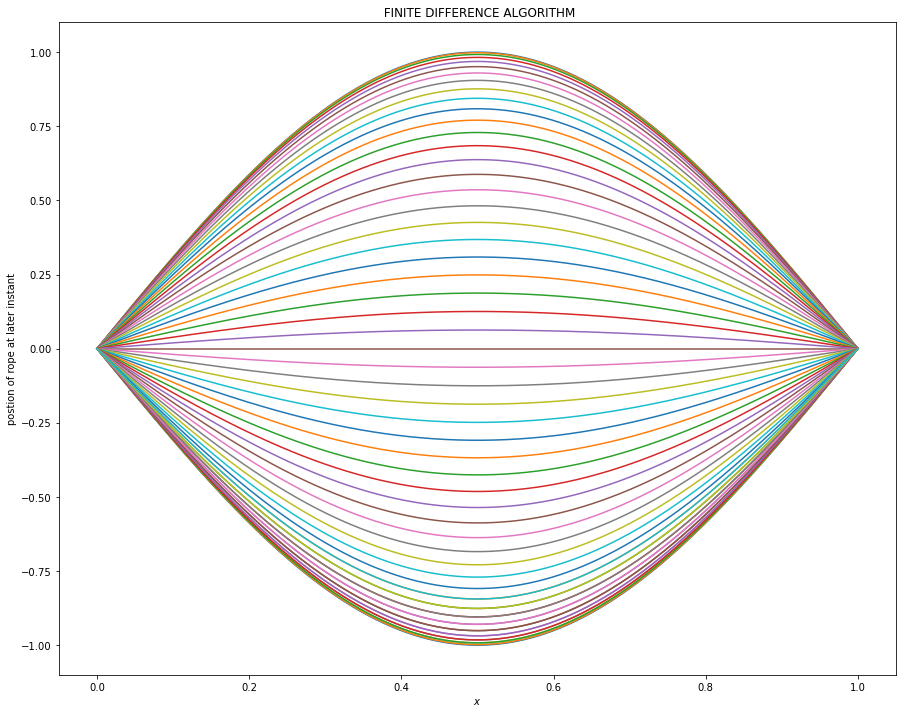

In [6]:
    
##plotting the shape of string at different instants    
plt.figure(figsize = (15,12))    
plt.xlabel (r'$x$')
plt.ylabel('postion of rope at later instant')
plt.title(' FINITE DIFFERENCE ALGORITHM')

for l in range(N_it):
    if(l%50==0):
        

        z12 = A1[:,l]

        plt.plot(x,z12 )

        z12 = 0
    
print('dt = ',dt)

plt.show()
         

# $ VOILA !!!$

#### Exercise : Check the energy conservation in stepping Algorithm